# Apple Stock Price Prediction using LSTM
We are creating an LSTM model to forecast Apple stock prices for next 6 months (Dec 2021 - May 2022)

# Data
About the data, it has been taken from Yahoo Finance website (https://finance.yahoo.com/quote/AAPL) and data contains values from 02-01-1990 to 30-11-2021

In [53]:
#Importing Libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("AAPL.csv")


In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800
...,...,...,...,...,...,...,...
8037,23-11-2021,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
8038,24-11-2021,160.750000,162.139999,159.639999,161.940002,161.940002,69463600
8039,26-11-2021,159.570007,160.449997,156.360001,156.809998,156.809998,76959800
8040,29-11-2021,159.369995,161.190002,158.789993,160.240005,160.240005,88748200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.9+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8.042000e+03
mean,16.351917,16.525066,16.178668,16.358983,15.594377,3.831832e+08
std,29.698129,30.021799,29.380971,29.717860,29.448485,3.633095e+08
min,0.114955,0.118304,0.113839,0.115513,0.099037,2.396800e+06
25%,0.367266,0.375000,0.358929,0.367188,0.308924,1.478439e+08
50%,2.111071,2.138393,2.058393,2.106428,1.805978,2.664242e+08
75%,21.204196,21.363661,20.989554,21.170268,18.389792,4.808804e+08
max,161.679993,165.699997,161.000000,165.300003,165.300003,7.421641e+09


In [6]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [7]:
data['Avg_price'] = data[['High','Low']].mean(axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.266423,183198400,0.323661
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.268211,207995200,0.337054
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.269106,221513600,0.339286
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.270000,123312000,0.335938
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.271788,101572800,0.334821


In [8]:
data.drop(['Open','Close','High','Low','Volume','Adj Close'], axis=1, inplace=True)
data.head()

,Date,Avg_price
0,1990-01-02,0.323661
1,1990-01-03,0.337054
2,1990-01-04,0.339286
3,1990-01-05,0.335938
4,1990-01-08,0.334821


In [9]:
data.set_index('Date', inplace=True)
data.head()

,Avg_price
Date,
1990-01-02,0.323661
1990-01-03,0.337054
1990-01-04,0.339286
1990-01-05,0.335938
1990-01-08,0.334821


Text(0, 0.5, 'Price')

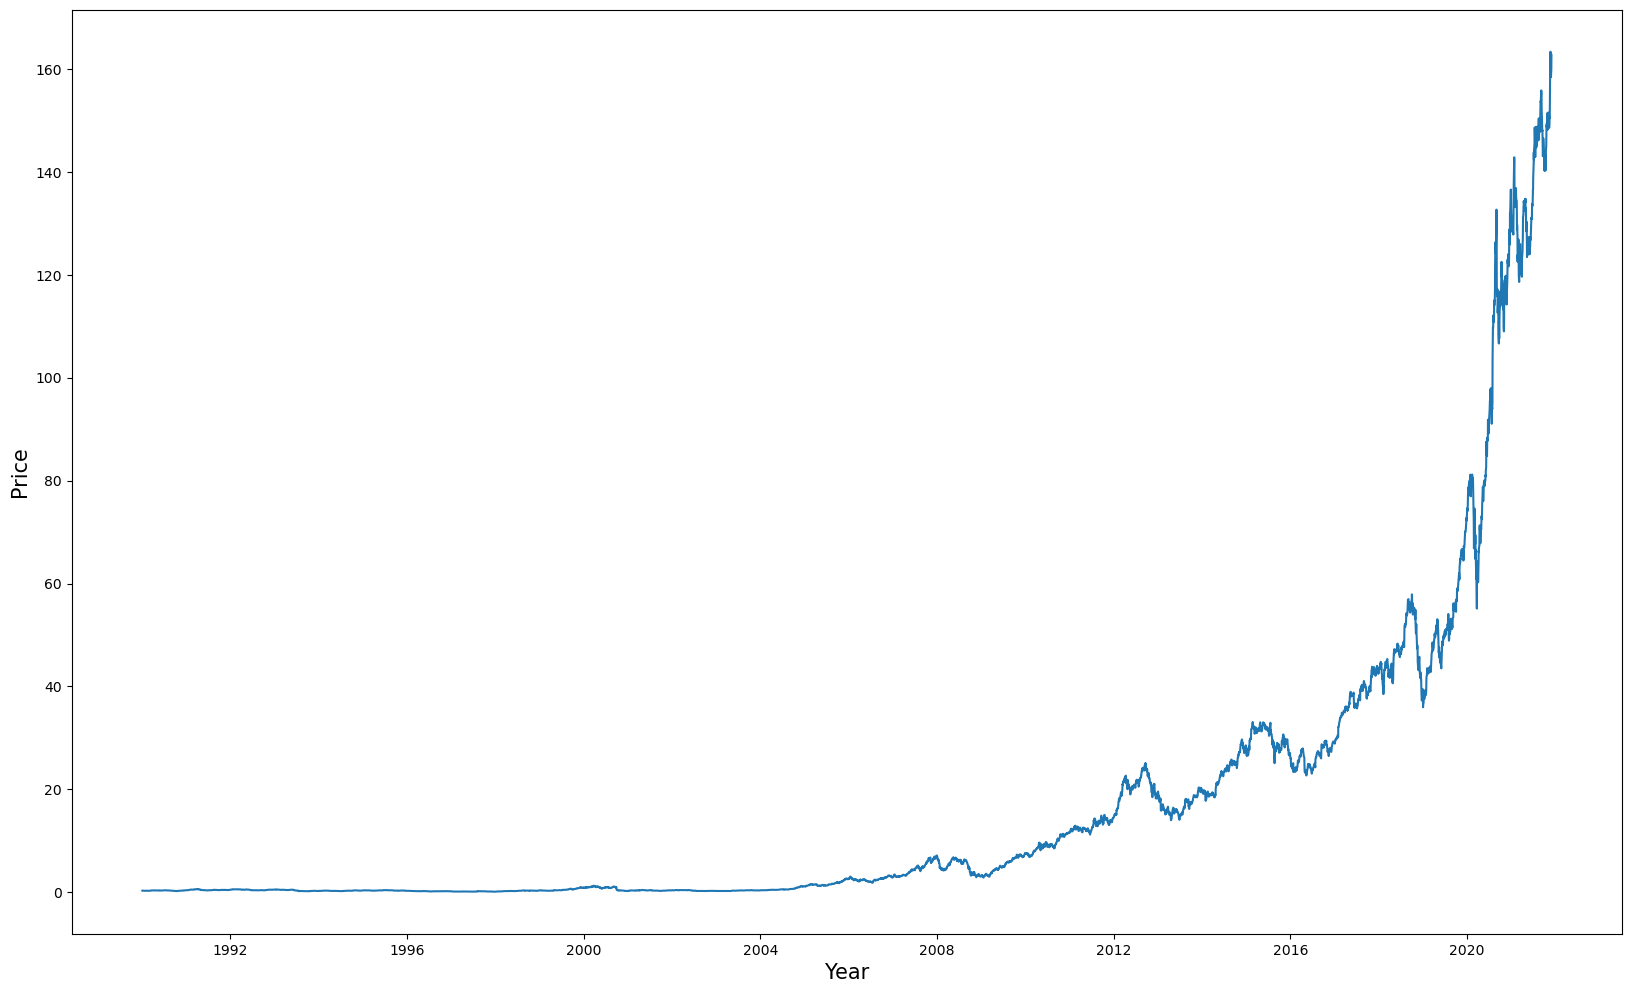

In [10]:
plt.figure(figsize=(20,12))
plt.plot(data)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [11]:
data.loc['1990-01-02']

Avg_price    0.323661
Name: 1990-01-02 00:00:00, dtype: float64

In [12]:
data.loc['2009-01-02']

Avg_price    3.146429
Name: 2009-01-02 00:00:00, dtype: float64

In [13]:
data.loc['2010-01-04']

Avg_price    7.622857
Name: 2010-01-04 00:00:00, dtype: float64

In [14]:
data.loc['2011-01-03']

Avg_price    11.698214
Name: 2011-01-03 00:00:00, dtype: float64

In [15]:
len(data.loc['1990-01-02':'2009-01-02'])

4792

In [16]:
data = data.iloc[4792:]
data

,Avg_price
Date,
2009-01-05,3.373036
2009-01-06,3.385000
2009-01-07,3.263571
2009-01-08,3.271250
2009-01-09,3.277143
...,...
2021-11-23,160.430001
2021-11-24,160.889999
2021-11-26,158.404999


Text(0, 0.5, 'Price')

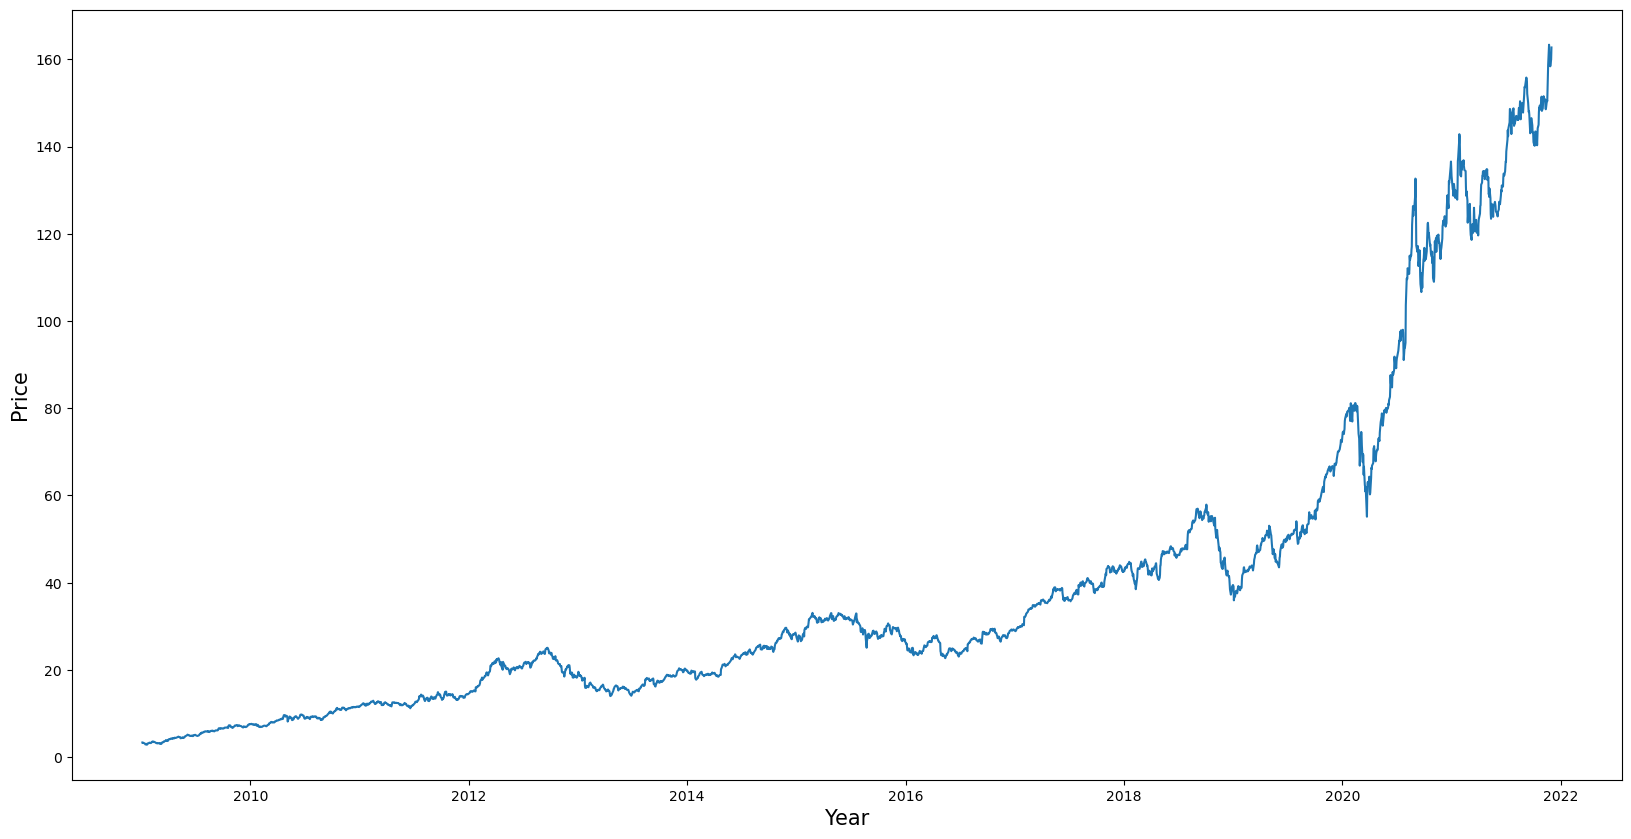

In [17]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [18]:
len(data)

3250

In [19]:
# Days in a year
len(data.loc['2009-01-05':'2010-01-05'])

253

In [20]:
len(data.loc['2011-01-05':'2012-01-04'])

252

In [21]:
data.index

DatetimeIndex(['2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-12', '2009-01-13', '2009-01-14',
               '2009-01-15', '2009-01-16',
               ...
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-26',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='Date', length=3250, freq=None)

In [22]:
len(data.loc['2021-05-30':'2021-11-30'])

128

In [23]:
test_size = 128
cutoff = len(data)- test_size

In [24]:
train = data.iloc[:cutoff]
test = data.iloc[cutoff:]

In [25]:
print(len(train))
print(len(test))

3122
128


In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(train)

MinMaxScaler()

In [28]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator
Create a TimeSeriesGenerator object based off the scaled_train data. length should be eual to the number that can capture the seasonality or patten or behaviour how prices increase or decrese in a cycle.

In [29]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 126 #(6 months days considering 252 average days in a year)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
model = Sequential()
n_features = 1

model.add(LSTM(100, input_shape=(length, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(25))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [32]:
X,y = generator[0]
print(X.shape)
print(y.shape)

(32, 126, 1)
(32, 1)


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 126, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 126, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 126, 50)           30200     
                                                                 
 dropout_1 (Dropout)         (None, 126, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [34]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=32)

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [36]:
# fit model\
model.fit_generator(generator,epochs=40,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/40
94/94 [==============================] - 43s 333ms/step - loss: 0.0066 - val_loss: 0.0616
Epoch 2/40
94/94 [==============================] - 29s 305ms/step - loss: 0.0036 - val_loss: 0.0230
Epoch 3/40
94/94 [==============================] - 29s 305ms/step - loss: 0.0022 - val_loss: 9.8567e-04
Epoch 4/40
94/94 [==============================] - 29s 303ms/step - loss: 0.0035 - val_loss: 0.0741
Epoch 5/40
94/94 [==============================] - 29s 310ms/step - loss: 0.0025 - val_loss: 0.0135
Epoch 6/40
94/94 [==============================] - 28s 302ms/step - loss: 0.0034 - val_loss: 0.0035
Epoch 7/40
94/94 [==============================] - 29s 306ms/step - loss: 0.0022 - val_loss: 0.0844
Epoch 8/40
94/94 [==============================] - 29s 313ms/step - loss: 0.0026 - val_loss: 0.0605
Epoch 9/40
94/94 [==============================] - 29s 313ms/step - loss: 0.0017 - val_loss: 0.0058
Epoch 10/40
94/94 [==============================] - 29s 308ms/step - loss: 0.0021 - va

<AxesSubplot:>

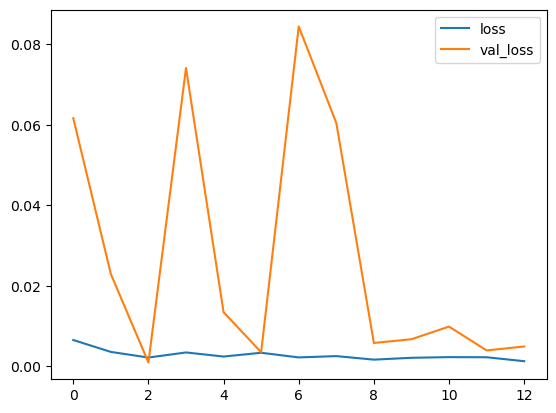

In [37]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [38]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


1/1 [==============================] - 0s 63ms/step


In [39]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test

,Avg_price,Predictions
Date,,
2021-06-01,124.645000,126.540123
2021-06-02,124.645001,126.520658
2021-06-03,123.989998,126.509846
2021-06-04,125.005001,126.507301
2021-06-07,125.575001,126.511573
...,...,...
2021-11-23,160.430001,127.792917
2021-11-24,160.889999,127.798499
2021-11-26,158.404999,127.804030


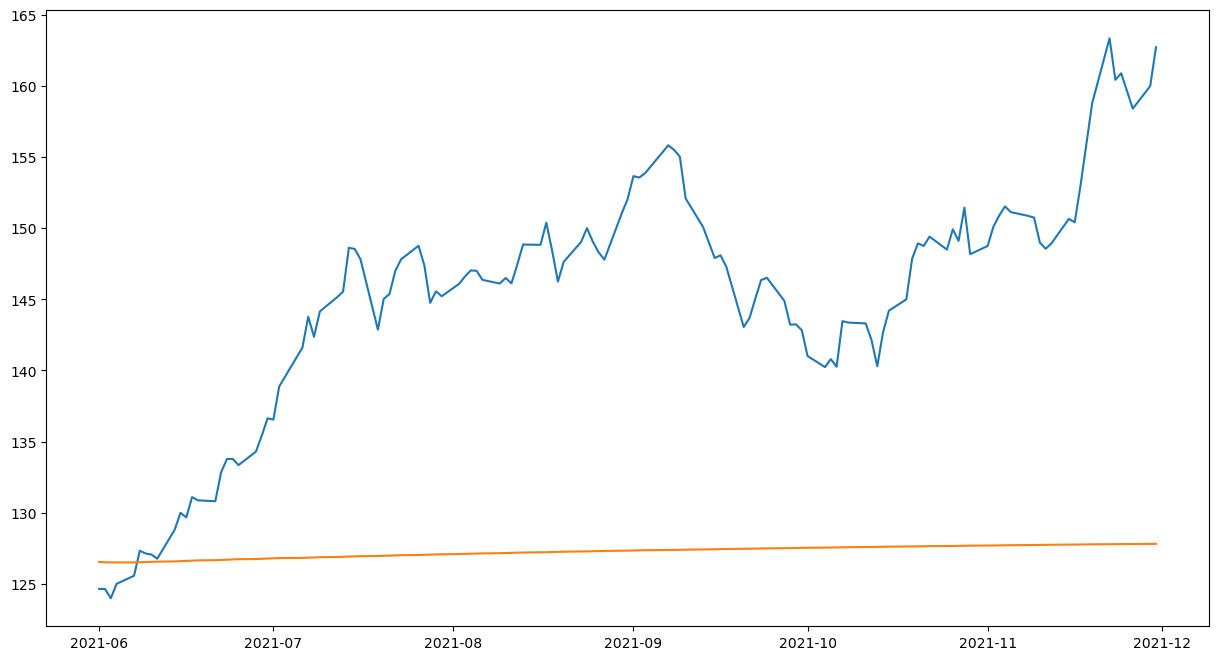

In [40]:
plt.figure(figsize=(15,8))
plt.plot(test)

In [41]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Avg_price'],test['Predictions']))

19.505095283020395

In [42]:
from dateutil.parser import parse
from dateutil.rrule import rrule, DAILY, MO, TU, WE, TH, FR

result = rrule(
  DAILY,
  byweekday=(MO,TU,WE,TH,FR),
  dtstart=parse('2021-12-01'),
  until=parse('2022-05-31')
)
print(list(result))

[datetime.datetime(2021, 12, 1, 0, 0), datetime.datetime(2021, 12, 2, 0, 0), datetime.datetime(2021, 12, 3, 0, 0), datetime.datetime(2021, 12, 6, 0, 0), datetime.datetime(2021, 12, 7, 0, 0), datetime.datetime(2021, 12, 8, 0, 0), datetime.datetime(2021, 12, 9, 0, 0), datetime.datetime(2021, 12, 10, 0, 0), datetime.datetime(2021, 12, 13, 0, 0), datetime.datetime(2021, 12, 14, 0, 0), datetime.datetime(2021, 12, 15, 0, 0), datetime.datetime(2021, 12, 16, 0, 0), datetime.datetime(2021, 12, 17, 0, 0), datetime.datetime(2021, 12, 20, 0, 0), datetime.datetime(2021, 12, 21, 0, 0), datetime.datetime(2021, 12, 22, 0, 0), datetime.datetime(2021, 12, 23, 0, 0), datetime.datetime(2021, 12, 24, 0, 0), datetime.datetime(2021, 12, 27, 0, 0), datetime.datetime(2021, 12, 28, 0, 0), datetime.datetime(2021, 12, 29, 0, 0), datetime.datetime(2021, 12, 30, 0, 0), datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 1, 3, 0, 0), datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 5, 0, 0)

In [43]:
list(result)

[datetime.datetime(2021, 12, 1, 0, 0),
 datetime.datetime(2021, 12, 2, 0, 0),
 datetime.datetime(2021, 12, 3, 0, 0),
 datetime.datetime(2021, 12, 6, 0, 0),
 datetime.datetime(2021, 12, 7, 0, 0),
 datetime.datetime(2021, 12, 8, 0, 0),
 datetime.datetime(2021, 12, 9, 0, 0),
 datetime.datetime(2021, 12, 10, 0, 0),
 datetime.datetime(2021, 12, 13, 0, 0),
 datetime.datetime(2021, 12, 14, 0, 0),
 datetime.datetime(2021, 12, 15, 0, 0),
 datetime.datetime(2021, 12, 16, 0, 0),
 datetime.datetime(2021, 12, 17, 0, 0),
 datetime.datetime(2021, 12, 20, 0, 0),
 datetime.datetime(2021, 12, 21, 0, 0),
 datetime.datetime(2021, 12, 22, 0, 0),
 datetime.datetime(2021, 12, 23, 0, 0),
 datetime.datetime(2021, 12, 24, 0, 0),
 datetime.datetime(2021, 12, 27, 0, 0),
 datetime.datetime(2021, 12, 28, 0, 0),
 datetime.datetime(2021, 12, 29, 0, 0),
 datetime.datetime(2021, 12, 30, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0),
 datetime.datetime(2022, 1, 3, 0, 0),
 datetime.datetime(2022, 1, 4, 0, 0),
 datetime.d

In [44]:
print(len(list(result)))
list(result)[0].strftime('%Y-%m-%d')

130


'2021-12-01'

In [45]:
forecast_date = []
for i in list(result):
  forecast_date.append(i.strftime('%Y-%m-%d'))

forecast_date = pd.Series(forecast_date)
forecast_date

0      2021-12-01
1      2021-12-02
2      2021-12-03
3      2021-12-06
4      2021-12-07
          ...    
125    2022-05-25
126    2022-05-26
127    2022-05-27
128    2022-05-30
129    2022-05-31
Length: 130, dtype: object

In [46]:
forecast_date = pd.to_datetime(forecast_date, dayfirst=True)
forecast_date

0     2021-12-01
1     2021-12-02
2     2021-12-03
3     2021-12-06
4     2021-12-07
         ...    
125   2022-05-25
126   2022-05-26
127   2022-05-27
128   2022-05-30
129   2022-05-31
Length: 130, dtype: datetime64[ns]

In [47]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 130

#first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 78ms/step


In [48]:
forecast = scaler.inverse_transform(forecast)
forecast_df = pd.DataFrame(data=forecast,index=forecast_date,
                           columns=['Forecast'])
forecast_df

,Forecast
2021-12-01,126.540123
2021-12-02,126.520658
2021-12-03,126.509846
2021-12-06,126.507301
2021-12-07,126.511573
...,...
2022-05-25,127.804030
2022-05-26,127.809487
2022-05-27,127.814901
2022-05-30,127.820266


<AxesSubplot:>

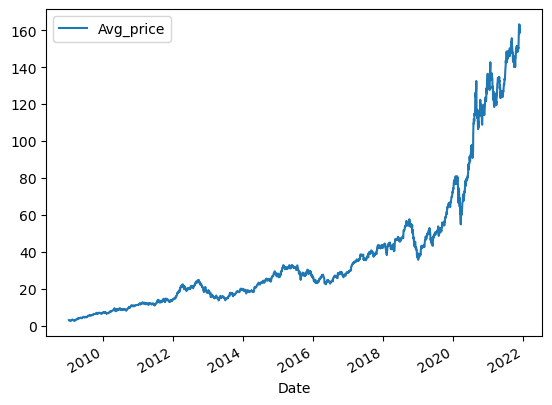

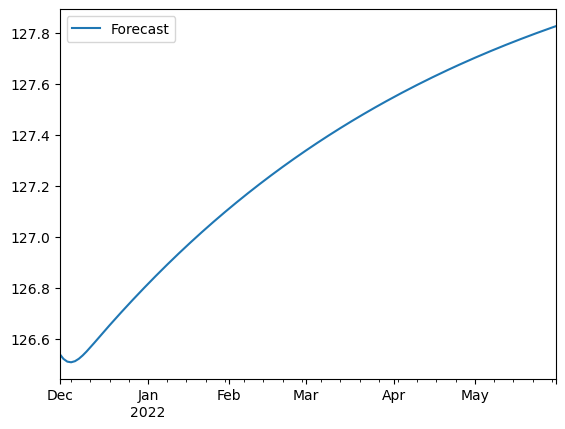

In [49]:
data.plot()
forecast_df.plot()

<AxesSubplot:xlabel='Date'>

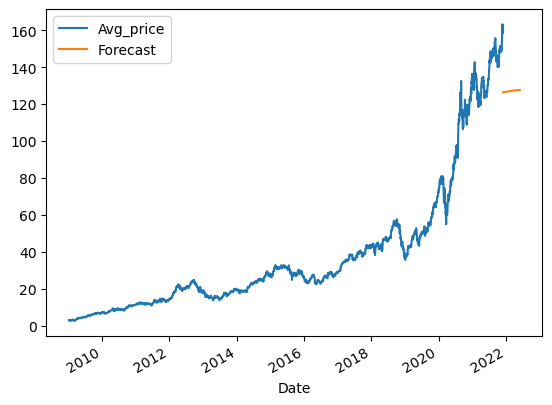

In [50]:
ax = data.plot()
forecast_df.plot(ax=ax)

(18628.0, 19143.0)

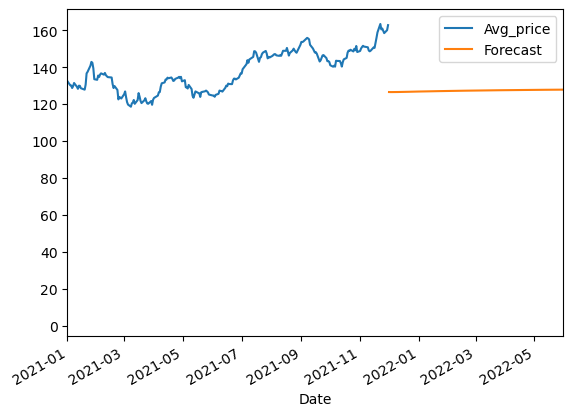

In [51]:
ax = data.plot()
forecast_df.plot(ax=ax)
plt.xlim('2021-01-01','2022-05-31')

In [52]:
model.save('AAPL_model.h5')